In [114]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
import datetime as dt #datetime
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20, 10)

In [115]:
# IMPORTING DATA

df = pd.read_csv('covid_complete.csv', parse_dates=['Date'], dayfirst=True)
df.head(5)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [116]:
#important columns
updated_df= df[['Date', 'Name of State / UT','Latitude','Longitude','Total Confirmed cases','Death','Cured/Discharged/Migrated','New recovered','New cases']]
updated_df.columns = ['date', 'state','lat','lon','total_conf_cases','death','cured','recoveries','new_cases']
updated_df

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,0,1
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,1
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,1289,2092
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,68,97
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,3287,4078
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,386,246


In [117]:
updated_df.describe()

,lat,lon,total_conf_cases,cured,recoveries,new_cases
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000
mean,23.185327,81.451837,11393.925192,6908.130648,283.069054,418.643009
std,6.635913,6.959475,37208.600846,23390.671258,947.925811,1259.748923
min,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,18.112400,76.271100,39.000000,9.000000,0.000000,1.000000
50%,23.940800,79.019300,619.000000,197.500000,8.000000,26.000000
75%,28.218000,85.313100,5233.000000,2736.000000,119.000000,210.250000
max,34.299600,94.727800,468265.000000,305521.000000,13401.000000,18366.000000


In [118]:
updated_df.dropna(inplace = True)

print(updated_df.isnull().sum())

date                0
state               0
lat                 0
lon                 0
total_conf_cases    0
death               0
cured               0
recoveries          0
new_cases           0
dtype: int64


<ipython-input-118-d7959368aaa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df.dropna(inplace = True)


In [119]:
print(updated_df.dtypes)

date                datetime64[ns]
state                       object
lat                        float64
lon                        float64
total_conf_cases           float64
death                       object
cured                      float64
recoveries                   int64
new_cases                    int64
dtype: object


In [120]:
updated_df['total_conf_cases'] = pd.to_numeric(updated_df['total_conf_cases'], errors = 'coerce')
updated_df['total_conf_cases'] = updated_df['total_conf_cases'].astype('int64')


<ipython-input-120-14dc70a58052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['total_conf_cases'] = pd.to_numeric(updated_df['total_conf_cases'], errors = 'coerce')
<ipython-input-120-14dc70a58052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['total_conf_cases'] = updated_df['total_conf_cases'].astype('int64')


In [121]:
updated_df['cured'] = pd.to_numeric(updated_df['cured'], errors = 'coerce')
updated_df['cured'] = updated_df['cured'].astype('int64')


print(updated_df.dtypes)

date                datetime64[ns]
state                       object
lat                        float64
lon                        float64
total_conf_cases             int64
death                       object
cured                        int64
recoveries                   int64
new_cases                    int64
dtype: object


<ipython-input-121-4a032406d6fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['cured'] = pd.to_numeric(updated_df['cured'], errors = 'coerce')
<ipython-input-121-4a032406d6fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['cured'] = updated_df['cured'].astype('int64')


In [122]:
#earlier dates
updated_df.head()

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,0,1
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,0,1
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0


In [123]:
#latest dates
updated_df.tail()

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,1289,2092
4688,2020-08-06,Tripura,23.9408,91.9882,5725,31,3793,68,97
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,3287,4078
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233,386,246
4691,2020-08-06,West Bengal,22.9868,87.8550,83800,1846,58962,2078,2816


In [124]:
latest_date = updated_df[updated_df.date=='2020-08-06']

In [125]:
latest_date.head()

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
4657,2020-08-06,Andaman and Nicobar Islands,11.7401,92.6586,1027,14,326,49,99
4658,2020-08-06,Andhra Pradesh,15.9129,79.7400,186461,1681,104354,8729,10128
4659,2020-08-06,Arunachal Pradesh,28.2180,94.7278,1855,3,1210,105,65
4660,2020-08-06,Assam,26.2006,92.9376,50445,121,35892,1471,2284
4661,2020-08-06,Bihar,25.0961,85.3131,64770,355,42414,2066,2982


In [126]:
#Sorting data by number of confirmed cases
max_cases_confirmed=latest_date.sort_values(by="new_cases",ascending=False)
max_cases_confirmed

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
4676,2020-08-06,Maharashtra,19.7515,75.7139,468265,16476,305521,6165,10309
4658,2020-08-06,Andhra Pradesh,15.9129,79.7400,186461,1681,104354,8729,10128
4672,2020-08-06,Karnataka,15.3173,75.7139,151449,2804,74679,5407,5619
4686,2020-08-06,Tamil Nadu,11.1271,78.6569,273460,4461,214815,6031,5175
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,3287,4078
4661,2020-08-06,Bihar,25.0961,85.3131,64770,355,42414,2066,2982
4691,2020-08-06,West Bengal,22.9868,87.8550,83800,1846,58962,2078,2816
4660,2020-08-06,Assam,26.2006,92.9376,50445,121,35892,1471,2284
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,1289,2092
4681,2020-08-06,Odisha,20.9517,85.0985,39018,225,25738,1255,1337


In [127]:
#States with maximum number of new cases
top_states_confirmed=max_cases_confirmed[0:5]
top_states_confirmed

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
4676,2020-08-06,Maharashtra,19.7515,75.7139,468265,16476,305521,6165,10309
4658,2020-08-06,Andhra Pradesh,15.9129,79.7400,186461,1681,104354,8729,10128
4672,2020-08-06,Karnataka,15.3173,75.7139,151449,2804,74679,5407,5619
4686,2020-08-06,Tamil Nadu,11.1271,78.6569,273460,4461,214815,6031,5175
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,3287,4078


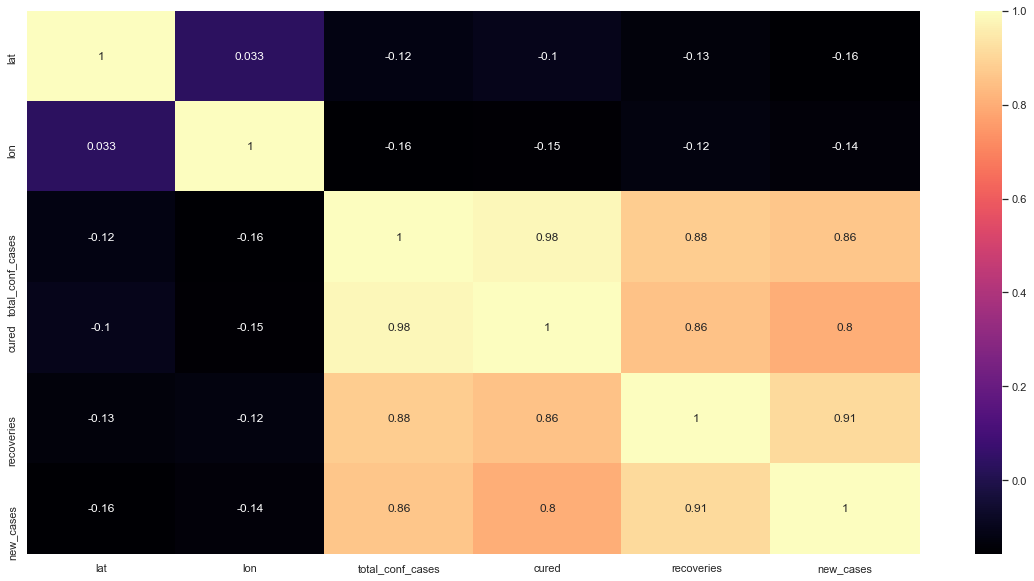

In [128]:
#heatmap
sb.heatmap(updated_df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

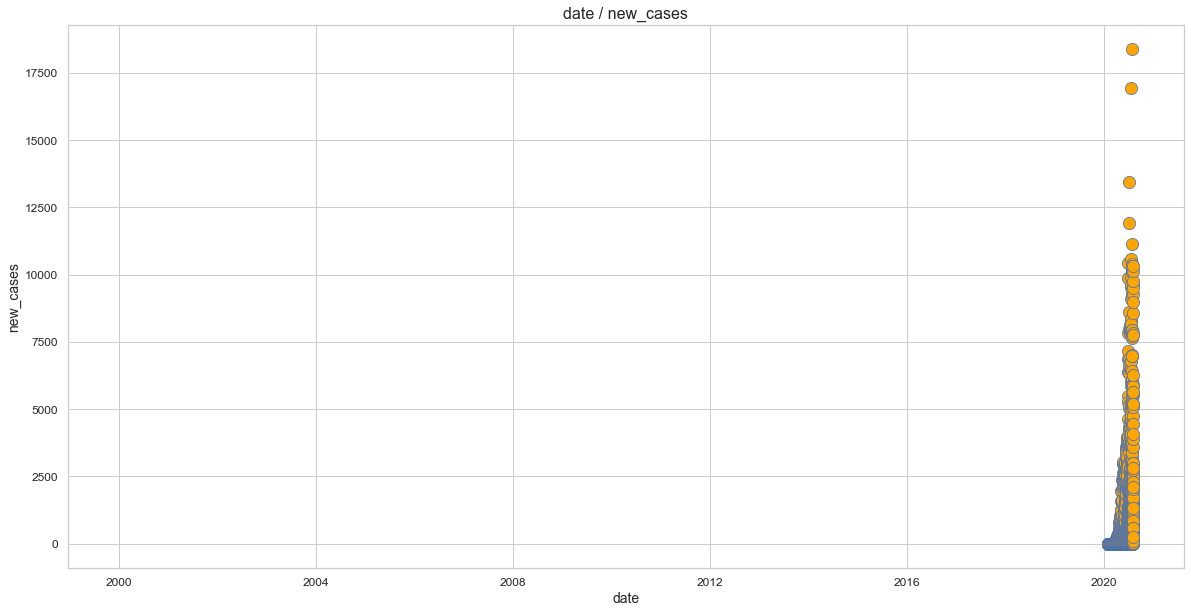

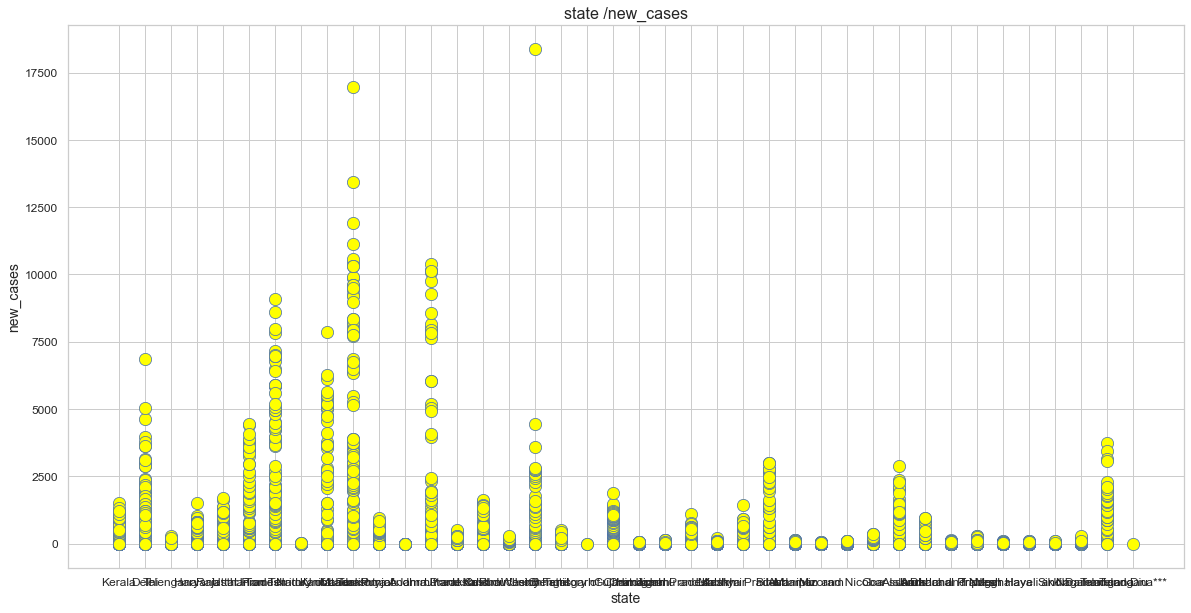

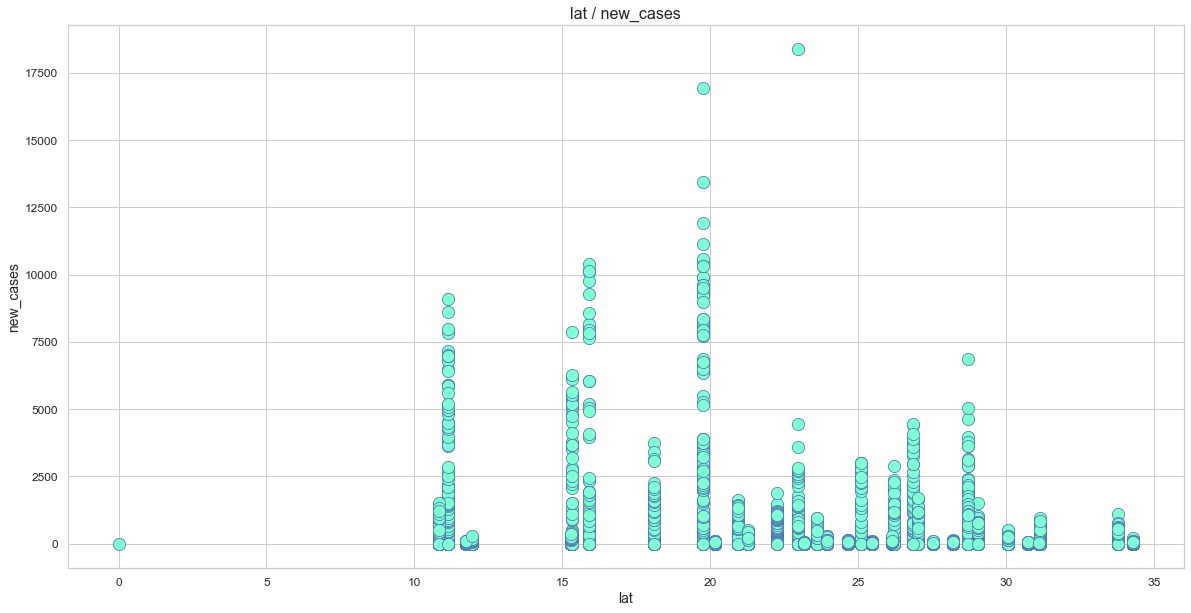

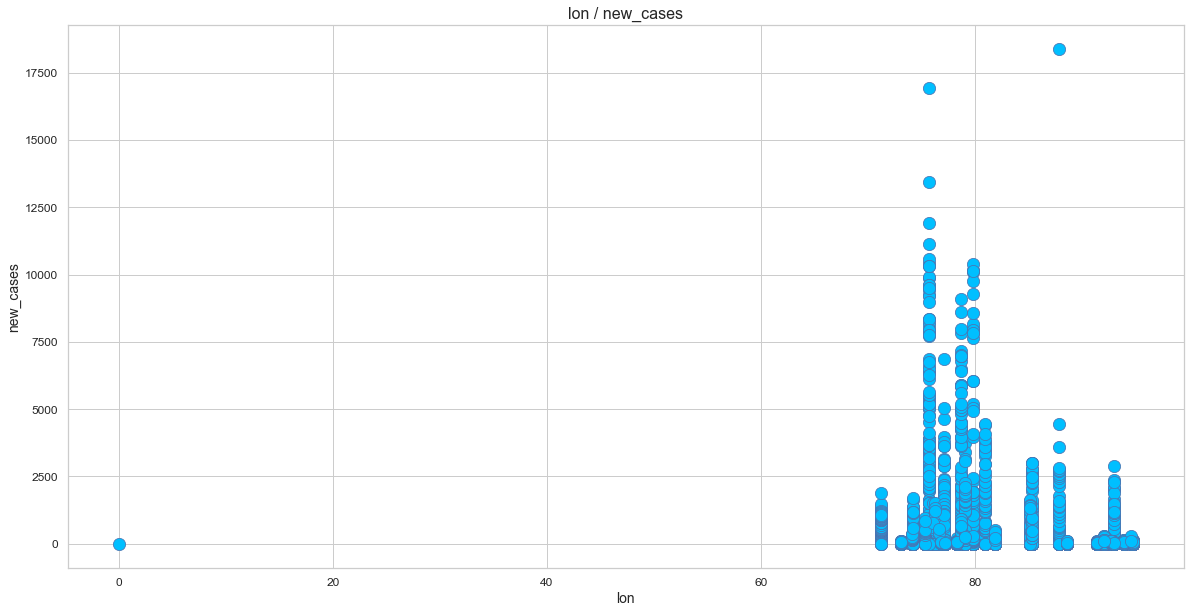

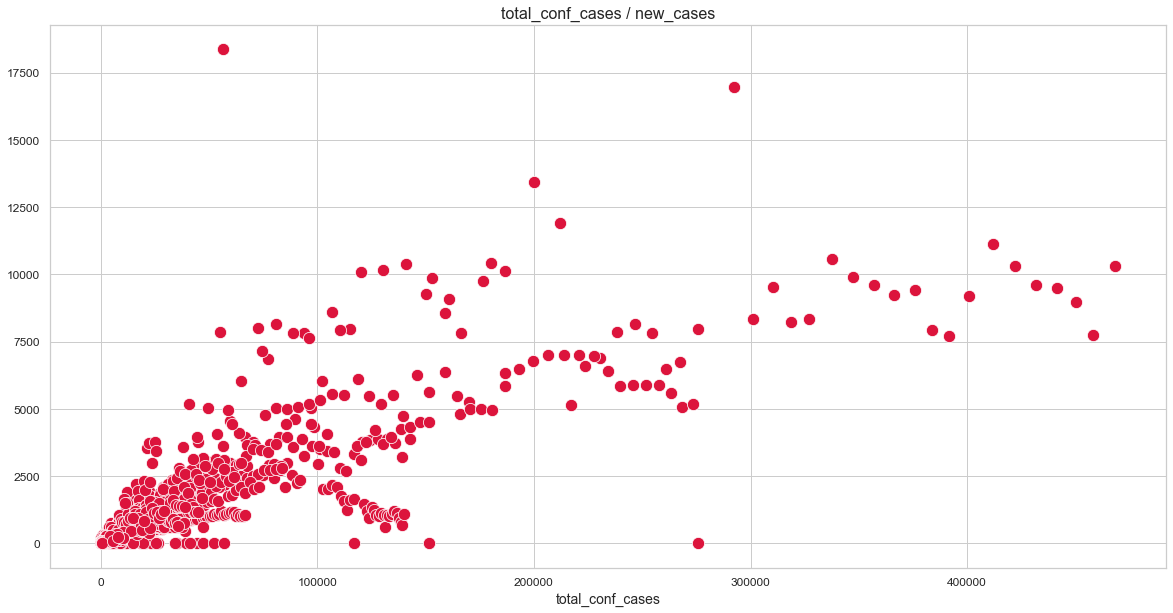

In [129]:
#scatter-plot for the given data
def scatter_df(y_var):
    scatter_df = updated_df.drop(y_var, axis = 1)
    i = updated_df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = updated_df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / new_cases'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('new_cases', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = updated_df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /new_cases'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('new_cases', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = updated_df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / new_cases'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('new_cases', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = updated_df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / new_cases'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('new_cases', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = updated_df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / new_cases'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    
scatter_df('new_cases')

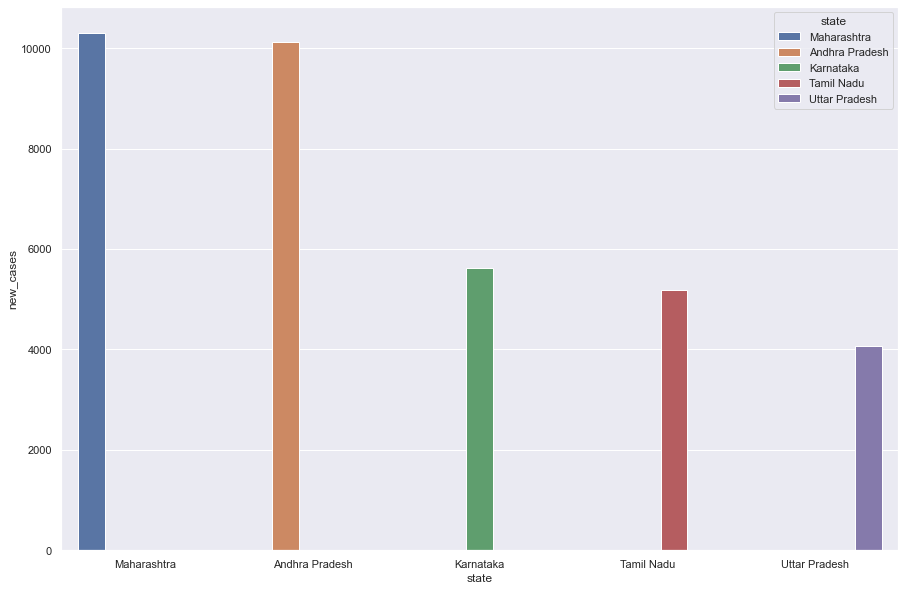

In [130]:
#Bar-plot for states with most number of new cases
sb.set(rc={'figure.figsize':(15,10)})
sb.barplot(x="state",y="new_cases",data=top_states_confirmed,hue="state")
plt.show()

In [131]:
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:5]
top_states_death

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254,98,5233,386,246
4673,2020-08-06,Kerala,10.8505,76.2711,29151,94,17533,1234,1195
4675,2020-08-06,Madhya Pradesh,22.9734,78.6569,35734,929,26064,650,652
4684,2020-08-06,Rajasthan,27.0238,74.2179,47272,745,33849,1017,593
4663,2020-08-06,Chhattisgarh,21.2787,81.8661,10407,71,7871,258,205


In [132]:
#Sorting cured cases of each state
max_cured_cases=latest_date.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
4676,2020-08-06,Maharashtra,19.7515,75.7139,468265,16476,305521,6165,10309
4686,2020-08-06,Tamil Nadu,11.1271,78.6569,273460,4461,214815,6031,5175
4665,2020-08-06,Delhi,28.7041,77.1025,140232,4044,126116,890,1076
4658,2020-08-06,Andhra Pradesh,15.9129,79.7400,186461,1681,104354,8729,10128
4672,2020-08-06,Karnataka,15.3173,75.7139,151449,2804,74679,5407,5619
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,3287,4078
4691,2020-08-06,West Bengal,22.9868,87.8550,83800,1846,58962,2078,2816
4687,2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,1289,2092
4667,2020-08-06,Gujarat,22.2587,71.1924,66669,2556,49433,1057,1070
4661,2020-08-06,Bihar,25.0961,85.3131,64770,355,42414,2066,2982


In [133]:
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:5]
print(top_states_cured)

           date           state      lat      lon  total_conf_cases  death  \
4676 2020-08-06     Maharashtra  19.7515  75.7139            468265  16476   
4686 2020-08-06      Tamil Nadu  11.1271  78.6569            273460   4461   
4665 2020-08-06           Delhi  28.7041  77.1025            140232   4044   
4658 2020-08-06  Andhra Pradesh  15.9129  79.7400            186461   1681   
4672 2020-08-06       Karnataka  15.3173  75.7139            151449   2804   

       cured  recoveries  new_cases  
4676  305521        6165      10309  
4686  214815        6031       5175  
4665  126116         890       1076  
4658  104354        8729      10128  
4672   74679        5407       5619  


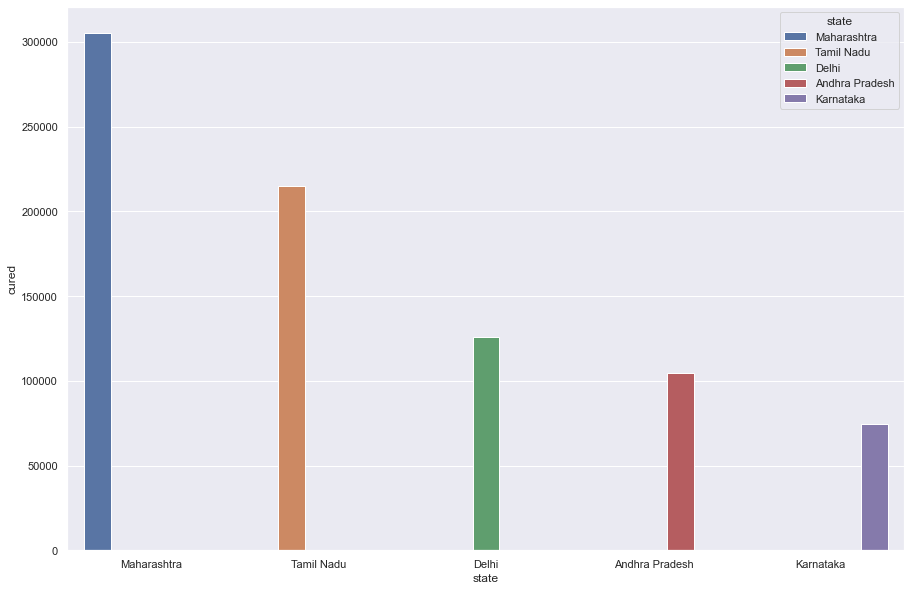

In [134]:
#Making bar-plot for states with top death cases
sb.set(rc={'figure.figsize':(15,10)})
sb.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [135]:
#ANDHRA PRADESH
a_p = updated_df[updated_df.state == 'Andhra Pradesh']

In [136]:
a_p

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
108,2020-03-12,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
121,2020-03-13,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
134,2020-03-14,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
147,2020-03-15,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
161,2020-03-16,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4518,2020-08-02,Andhra Pradesh,15.9129,79.74,150209,1407,76614,12750,9276
4553,2020-08-03,Andhra Pradesh,15.9129,79.74,158764,1474,82886,6272,8555
4588,2020-08-04,Andhra Pradesh,15.9129,79.74,166586,1537,88672,5786,7822
4623,2020-08-05,Andhra Pradesh,15.9129,79.74,176333,1604,95625,6953,9747


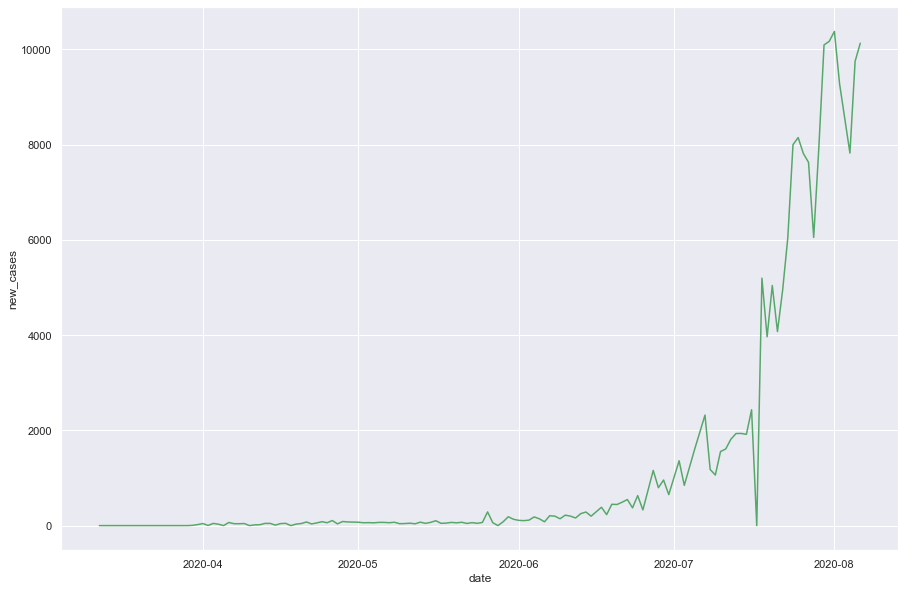

In [137]:
#Visualizing total number of new cases in andhra pradesh
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x="date",y="new_cases",data=a_p,color="g")
plt.show()

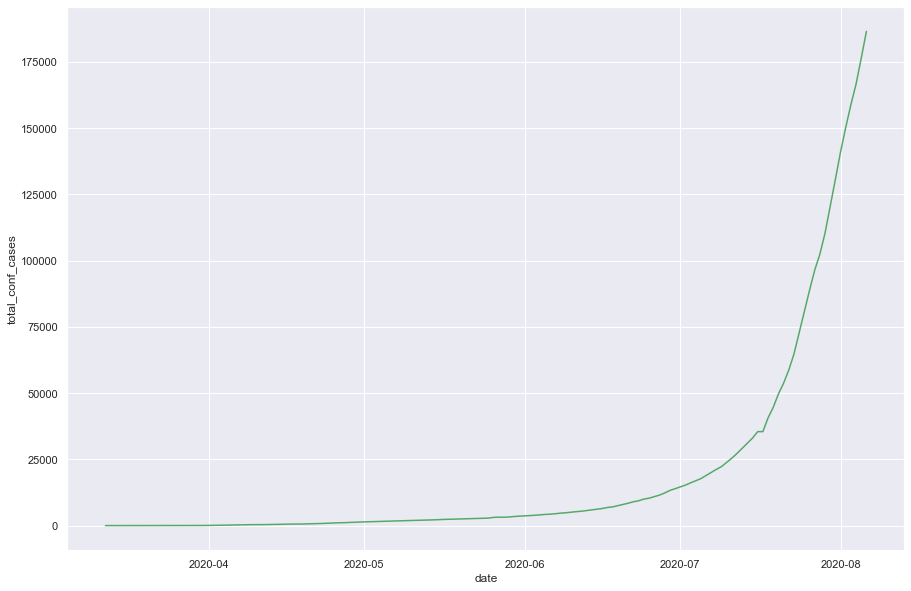

In [138]:
#Visualizing total number of confirmed cases in andhra pradesh
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x="date",y="total_conf_cases",data=a_p,color="g")
plt.show()

In [139]:
#Tamil Nadu
t_n= updated_df[updated_df.state == 'Tamil Nadu']
t_n

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
60,2020-03-07,Tamil Nadu,11.1271,78.6569,1,0,0,0,0
68,2020-03-08,Tamil Nadu,11.1271,78.6569,1,0,0,0,0
79,2020-03-09,Tamil Nadu,11.1271,78.6569,1,0,0,0,0
91,2020-03-10,Tamil Nadu,11.1271,78.6569,1,0,0,0,0
103,2020-03-11,Tamil Nadu,11.1271,78.6569,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4546,2020-08-02,Tamil Nadu,11.1271,78.6569,251738,4034,190966,7010,5879
4581,2020-08-03,Tamil Nadu,11.1271,78.6569,257613,4132,196483,5517,5875
4616,2020-08-04,Tamil Nadu,11.1271,78.6569,263222,4241,202283,5800,5609
4651,2020-08-05,Tamil Nadu,11.1271,78.6569,268285,4349,208784,6501,5063


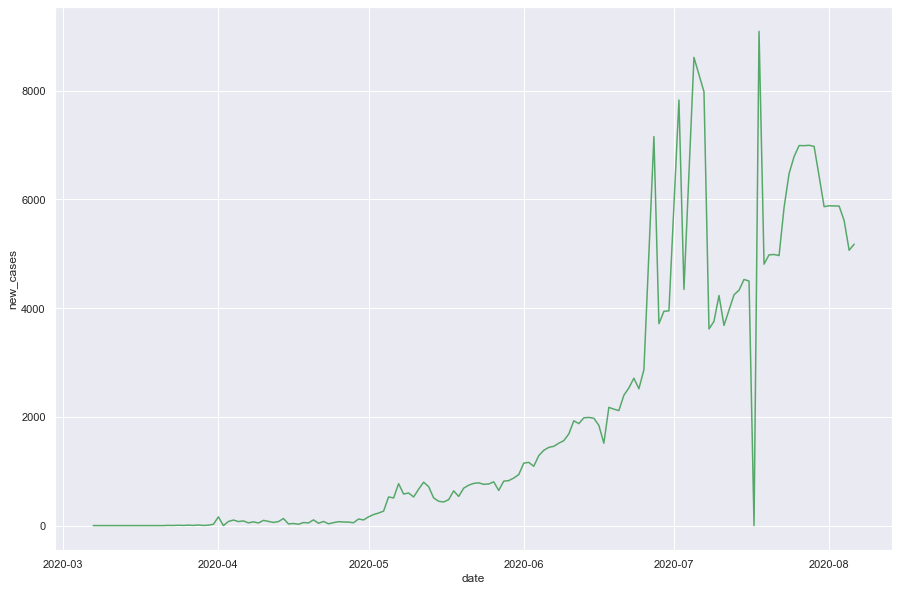

In [140]:
#Visualizing new cases in Tamil Nadu
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x="date",y="new_cases",data=t_n,color="g")
plt.show()

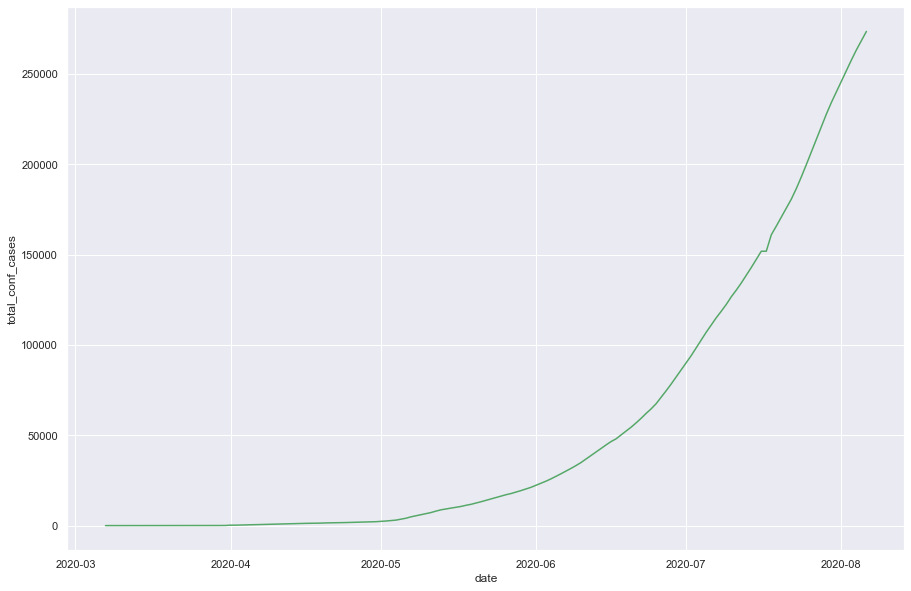

In [141]:
#Visualizing confirmed cases in Tamil Nadu
sb.set(rc={'figure.figsize':(15,10)})
sb.lineplot(x="date",y="total_conf_cases",data=t_n,color="g")
plt.show()

In [142]:
a_p

,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
108,2020-03-12,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
121,2020-03-13,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
134,2020-03-14,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
147,2020-03-15,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
161,2020-03-16,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4518,2020-08-02,Andhra Pradesh,15.9129,79.74,150209,1407,76614,12750,9276
4553,2020-08-03,Andhra Pradesh,15.9129,79.74,158764,1474,82886,6272,8555
4588,2020-08-04,Andhra Pradesh,15.9129,79.74,166586,1537,88672,5786,7822
4623,2020-08-05,Andhra Pradesh,15.9129,79.74,176333,1604,95625,6953,9747


In [143]:
#converting date-time to ordinal
a_p['date']=a_p['date'].map(dt.datetime.toordinal)
a_p.head()

<ipython-input-143-b074e8baa22b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_p['date']=a_p['date'].map(dt.datetime.toordinal)


,date,state,lat,lon,total_conf_cases,death,cured,recoveries,new_cases
108,737496,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
121,737497,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
134,737498,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
147,737499,Andhra Pradesh,15.9129,79.74,1,0,0,0,0
161,737500,Andhra Pradesh,15.9129,79.74,1,0,0,0,0


In [144]:
#getting dependent variable and inpedent variable
X_var=a_p[['date','total_conf_cases','death','cured','recoveries']].values
y_var=a_p['new_cases'].values
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)


In [145]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

C:\Users\psai1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12203976.01114297, tolerance: 88913.46279478261
  model = cd_fast.enet_coordinate_descent(
C:\Users\psai1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12204022.145781187, tolerance: 88913.46279478261
  model = cd_fast.enet_coordinate_descent(


In [146]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.961145912091612
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.961146334255257
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9619065991045738
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.9661616745057211
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.9619069954499617
-------------------------------------------------------------------------------


In [147]:

# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.9556322650267915
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.955632738041225
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.956475353238763
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.96128154815521
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.956475798192604
-------------------------------------------------------------------------------
